In [1]:
# load in the usual Python tools:
import os
import glob
import pickle
import re

# Our numerical workhorses
import numpy as np
import pandas as pd

# Import the project utils
import sys
sys.path.insert(0, '../code/')
import NB_sortseq_utils as utils

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Seaborn, useful for graphics
import seaborn as sns

sns.set_palette("deep", color_codes=True)
utils.set_plotting_style1()
%matplotlib inline

We first need to load in all the processed Sort-Seq summary files:

In [2]:
datadir = '../code/sortseq/*/'
files = glob.glob(datadir+'*_summary.csv')

df = pd.DataFrame()

for f in enumerate(files):
    df_temp = pd.DataFrame()
    df_temp = pd.read_csv(f[1])
    # append data to df
    df = df.append(df_temp)

We can then take a look at what Sort-Seq experiments are available to plot:

In [3]:
grouped_df = df[['promoter','strain','media', 'condition', 'date']].copy()
grouped_df = grouped_df.groupby(['promoter','strain','media','condition', 'date'])

print('(promoter, strain, growth media, condition, date)')
print('------------------------------------')
for key, item in grouped_df:
    print(key)

(promoter, strain, growth media, condition, date)
------------------------------------
('dgoR', 'JK10', 'EZrichgalactonate', '500cAMP', 20160921)
('dgoR', 'JK10', 'EZrichglucose', '0cAMP', 20160921)
('dgoR', 'JK10', 'M9galactonate', 'na', 20160920)
('dgoR', 'MG1655', 'M9galactonate', 'na', 20160707)
('dgoR', 'MG1655', 'M9galactonate', 'na', 20160710)
('dgoR', 'MG1655', 'M9glucose', 'na', 20160707)
('dgoR', 'MG1655', 'M9glucose', 'na', 20160710)
('dgoR', 'MG1655deltadgoR', 'M9galactonate', 'na', 20160921)
('dgoR', 'MG1655deltadgoR', 'M9glucose', 'na', 20160824)
('lacZ', 'MG1655', 'M9glucose', 'na', 2011)
('marR', 'MG1655', 'LB', 'na', 20150513)
('marR', 'MG1655', 'LB', 'na', 20150820)
('marR', 'MG1655deltamarR', 'LB', 'na', 20150513)
('marR', 'MG1655deltamarRAB', 'LB', 'na', 20150513)
('purT', 'MG1655', 'M9glucose', 'adenine', 20160710)
('purT', 'MG1655', 'M9glucose', 'na', 20160710)
('purT', 'MG1655deltapurR', 'M9glucose', 'adenine', 20160824)
('relB', 'MG1655', 'M9glucose', '15percent

As an example, lets say we want to plot our _lacZ_ promoter data, with cells grown in M9 minimal media with 0.5% glucose (strain MG1655). We will create a new pandas dataframe to hold only this data:

In [4]:
df_forplotting = df[(df.promoter == 'yebG') & 
        (df.strain == 'MG1655') & 
        (df.media == 'M9glucose') &
        (df.condition == 'na') &
        (df.date==20170717)].copy()

Now we can plot the data. Use function 'utils.plot_data(df_forplotting, [type]).

Set [type] equal to the following:  
'expshift' for an expression shift plot.  
'infofootprint' for an information footprint plot.  
'mutrate' for a plot of mutation rate across the mutated windows.

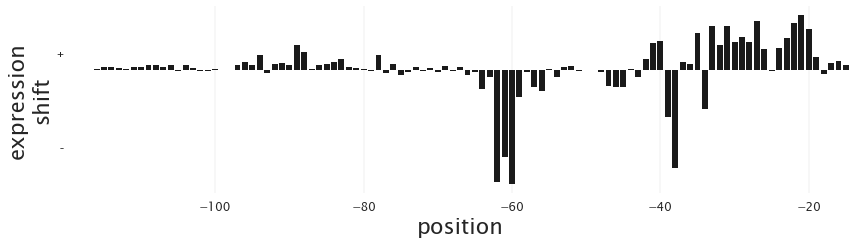

In [5]:
utils.plot_data(df_forplotting,'expshift')

# save to file
plt.tight_layout()
figname_out = '20171017_purT_expshift.pdf'
# plt.savefig(figname_out, format='pdf')

In [7]:
df_forplotting.head()

,MI,WT_bp,bincount,condition,date,delta_bin,delta_bin_3bpavg,expshift,expshift_3bpavg,expshift_yerr_lower,expshift_yerr_upper,media,mutation_rate,mutregion,position,promoter,seq_files,strain
0,0.000059,G,4,na,20170717,NaN,NaN,0.003770,0.003373,NaN,NaN,M9glucose,0.163025,mut1,-119,yebG,['../../../data/sortseq_raw/20170717_yebG_repe...,MG1655
1,0.000014,A,4,na,20170717,NaN,NaN,0.002448,0.002436,NaN,NaN,M9glucose,0.093702,mut1,-118,yebG,['../../../data/sortseq_raw/20170717_yebG_repe...,MG1655
2,0.000009,T,4,na,20170717,NaN,NaN,0.004212,0.004416,NaN,NaN,M9glucose,0.126939,mut1,-117,yebG,['../../../data/sortseq_raw/20170717_yebG_repe...,MG1655
3,0.000021,T,4,na,20170717,NaN,NaN,0.009469,0.010183,NaN,NaN,M9glucose,0.139296,mut1,-116,yebG,['../../../data/sortseq_raw/20170717_yebG_repe...,MG1655
4,0.000066,A,4,na,20170717,NaN,NaN,0.016217,0.016394,NaN,NaN,M9glucose,0.105175,mut1,-115,yebG,['../../../data/sortseq_raw/20170717_yebG_repe...,MG1655
